<a href="https://colab.research.google.com/github/rajnishdascse/Machine_Learning/blob/gh-pages/Keras_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

#Import the libary

In [3]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random



These are some configuration parameters and hyperparameters.



In [53]:
img_rows, img_cols = 28,28

batch_size = 128

num_classes = 10

epochs = 20

dropout = 0.7


#Load data

In [56]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

orig_test = x_test

Following cell displays random test images to get an idea of what they look like

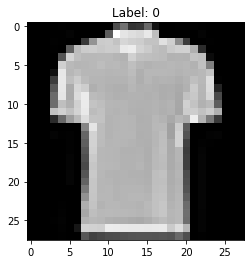

In [58]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' %y_test[index])
plt.show()

#Data preparation

In [59]:
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
x_train, x_test = x_train/255.0 , x_test/255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#Define model

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation='relu' , input_shape = input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation ='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

#Train model

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.6525 - accuracy: 0.7714 - val_loss: 0.3698 - val_accuracy: 0.8663
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4390 - accuracy: 0.8443 - val_loss: 0.3211 - val_accuracy: 0.8843
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3806 - accuracy: 0.8642 - val_loss: 0.2911 - val_accuracy: 0.8953
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3474 - accuracy: 0.8771 - val_loss: 0.2667 - val_accuracy: 0.9029
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3248 - accuracy: 0.8836 - val_loss: 0.2569 - val_accuracy: 0.9067
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3047 - accuracy: 0.8907 - val_loss: 0.2503 - val_accuracy: 0.9081
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2920 - accuracy: 0.8959 - val_loss: 0.2477 - val_accuracy: 0.9086
Epoch 

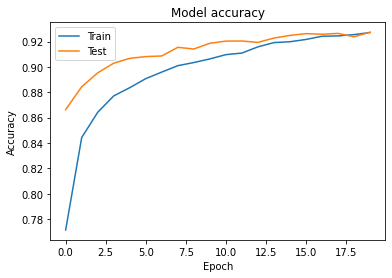

In [61]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

#train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

#evaluate the model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc ='best')
plt.show()


#Make prediction

In [49]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

The following cell chooses a random test image, prints the model predicted value, expected value (label), and the original image.



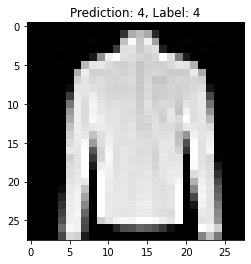

In [64]:
index = random.randrange(1000)
plt.title('Prediction: %d, Label: %d' %(most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

#Error Analysis

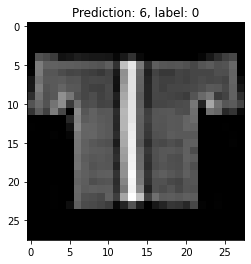

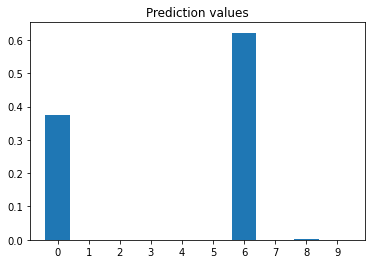

In [66]:
for i in range(1000):
  index = random.randrange(1000)
  if most_likely[index] != y_test[index]:
    break
plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' %(most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index],tick_label = range(10))
plt.title('Prediction values')
plt.show()